# HuBMAP masks and probability density function

> Idea: Knowing that the glomeruli are mainly found in the cortex, we should focus on this region during training.

## Motivation

### Background

A glomerulus is a network of small blood vessels located at the beginning of a nephron in the kidney ([Wikipedia](https://en.wikipedia.org/wiki/Glomerulus_(kidney))
)). Glomeruli are mainly found in the renal **cortex**, while the renal **medulla** contains mainly the renal tubule. Since we are dealing with biological structures, the separation is not not absolute and the transitions are not always perfectly sharp.

![Diagram of a nephron](http://s3-us-west-2.amazonaws.com/courses-images/wp-content/uploads/sites/1842/2017/05/26234530/m9skcbftjqzrokkkopam.png)
[Diagram of a nephron from libretexts.org, Introductory and General Biology](https://bio.libretexts.org/Bookshelves/Introductory_and_General_Biology/Book%3A_General_Biology_(Boundless)/41%3A_Osmotic_Regulation_and_the_Excretory_System/41.4%3A_Human_Osmoregulatory_and_Excretory_Systems/41.4B%3A_Nephron%3A_The_Functional_Unit_of_the_Kidney)

### HuBMAP 2020 dataset

The [HuBMAP 2020 dataset](https://www.kaggle.com/c/hubmap-kidney-segmentation/data) comprises several Formalin Fixed Paraffin Embedded (FFPE) PAS kidney images and corresponding glumeroli segmenation masks.

![](https://www.kaggleusercontent.com/kf/48229620/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..eO4fOXGg1ZtY-GJPoGTPsw.Wqja5ZPpE4ZWFaiKMeUFgsbT3oDfdwT0vNrftefV1WXL76dL0Ng0psniKYw8vBWEtpreMrjUU9Ms3m42nuoEPxuQd5LEtu_zp26zVUTbqc6FJ0be5IfA_Z-cxnLUOoNAqLdazqZ_daCixtEkkRUhJcP5Y3jL3mZpZpOj2hB_q7swIvcNBKUbSCDQ7Cq8RGTIJLk220fVTGoq5cX4lmWxD4nFbTtJBi_QSx94q4rUvow898mxE9OTmpQvTlq4BNG-v7FlgMlkGDmV3IbP15Hualc3jh5kf8BiUVIRGq6rOZsoGF9W2X_egRt2GvjOrdKApkldh3caX5-2v8GZ560XDcZbQ139IixsJxZ8mP9jQXYO4jfG3uasd4Uqbf0DeLwXf5_KJ9eKR56M6mBflueyTtO2-Nm0OR9YbeJqAR95OHw-3egZ0SvZUCUb-PI7nFxDzjOWAb7Vc0_Fq_K9P_0cPhG-8bkDPNfWtLgGM0OJLgiBq0-iMMxJO_F3yuyVhI2QpSDqvJ8jTFvvfK8bqXlruFoSDo-ypTT9CMVkImokF0cBmo5TUrN1p03SaNT5O8jasrn8XdYCRraoqooivlebfrjsplfngo90KtbQdk8kyN0Ud97-DTEtWaNoZ22SWL5N5flwAUg26rh9xzfpN9lANvV56D98ua1-XiSAHIFbies.u-bNjVwxqDpkJ_vFdlP_GQ/__results___files/__results___30_0.png)
[Example image 0486052bb, taken from ihelons EDA Notebook](https://www.kaggle.com/ihelon/hubmap-exploratory-data-analysis)

Both the training and public test sets also include anatomical structure segmentations (Example from this [notebook](https://www.kaggle.com/matjes/hubmap-anatomy-zarr), green=Cortex, yellow=Medulla)

![](https://www.kaggleusercontent.com/kf/56694565/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..qGrbhci55WIxOMKHmwicjw.mgaY_seAj93TAYBdJaOgDP42sKLsBIUnUZW-bSqxcBTLaf_ovcCKDIkgwwnlw6qSPb4Z-QipJipsbek3aXzcOKOYvfvs8H0cKWxBPZ5jqNBLQkx3Q1is2ScTA2nDsA-H8zinmIaBNPH7sX53ZxpnX7bBQQfUlAKM7IJnuxOoLBhfqzEh7wXx5BgDYepzZlKvvM9OH09qcSsTQ2j0QwDfHc7cM-LaRtk1zEPbGaxED1eZS1aBvcHZKt5npSlgqf-cLDCzck2YB1MkdMiUoxlDFaZi8D4fD_ZYEfN3Hc4alQVLfKAdpGyqGeSgjhc_x5L6NkGf10eDzY9pfVKX2uNHbltOMrcpEoySOTSfpRrnKEzlUnjQ3c8h_dLjvNIbO_XUboEQuLXLYaAepYZv-xTfir34OzXQyjAgRnEbyZ4jMdts2nqZ2buwTWyJASs-MMaIuh3Lnw3JP3Enub_zdEaNfkcpsuvXvIyfr2lc5n0wP1gaJ_jM83CwVTrmrkHMa7FAsjM4ak0sfp7VAFjYcul-yMga17xf3Oqk8IisQjLpAcbGr_V0GVk_LFDoHD3oYjAIuLQL0H0r87hXn0A4z8q0vBaPQRZ5QP3gONya12gOFEwqzeqfFujbfc1NbEXAP2rwELDKX3I5MyFk81IgnbvJU_AyIkE7v59W-ThGWrmICzI.iFYFPts-eAsVDZ0ASGCmOQ/__results___files/__results___5_33.png)

[Anatomical structure of 0486052bb](https://www.kaggle.com/matjes/hubmap-anatomy-zarr)


### Key Idea

A common approach to deal with the very large (>500MB - 5GB) TIFF files in the dataset is to decompose the images in smaller patches/tiles, for instance by using a sliding window apporach.
> **Knowing that the glomeruli are mainly found in the cortex, we should focus on this region during training**. 

Instead of preprocessing the images and saving them into fixed tiles, we randomly sample random tiles from the entire images with a higher probability to sample tiles that contain glumeroli and cortex.


## Advantages of this approach

In combination with [deepflash2](https://github.com/matjesg/deepflash2/tree/master/) and the deepflash2 [pytorch datasets](https://matjesg.github.io/deepflash2/data.html#Datasets) in particular, this approach has several advantages:
- no preprocessing of the data (only saving them to .zarr files for memory efficient loading)
    - flexible tile shapes (input shapes, e.g. 1024, 512, 256) at runtime
    - flexible scaling (e.g., by facors of 2,3,4)
- faster convergence during traing
    - focusing on the relevant regions (e.g., tiles that contain glumeroli and cortex)
    - "additional" data augmentation from random sampling (compared to fixed windows)

## Implementation (masks and probability density function)

> - Create segmentations masks from RLE
> - Create probability density function (PDF) for efficient sampling from mask and anatmical structure


**Inputs**
- RLE glumeroli segmentations ([challenge dataset](https://www.kaggle.com/c/hubmap-kidney-segmentation/data))
- Anatomical region masks ([.zarr converted](https://www.kaggle.com/matjes/hubmap-anatomy-zarr))
    - Values: 0=other, 1=cortex, 2=medulla
    

**Settings**

The name of the notbook contains the parameters of the probability density function. 
Glumeroli pixels are fixed with a sampling weight of 1. Then, for instance, *pdf_0.5_0.25_0.01* means:

- Sampling weight for cortex regions (`cortex_value`): 0.5 
- Sampling weight for medulla regions (`medulla_value`): 0.25
- Sampling weight for other regions (`fbr`, foreground-background-ratio): 0.01       


In [1]:
import os
print(os.path.abspath('.'))

/home/ysm/sugar/competion/kaggle_cv/Efficient Sampling (deepflash2)


In [2]:
# Install zarr and load packages
# !pip install -qq zarr
import cv2, zarr, gc
import matplotlib.pyplot as plt, numpy as np, pandas as pd
from pathlib import Path
gc.enable()

In [3]:
# from https://www.kaggle.com/paulorzp/rle-functions-run-lenght-encode-decode
def rle2mask(mask_rle, shape):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (width,height) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [
        np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])
    ]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0] * shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo : hi] = 1
    return img.reshape(shape).T

Settings

In [4]:
scale = 2
resize=512 # For pdf

# Input 
path = Path('../input/hubmap-kidney-segmentation')
df_train = pd.read_csv(path/"train.csv")
df_info = pd.read_csv(path/"HuBMAP-20-dataset_information.csv")
grp_anatomy = zarr.open_group('../input/anatomy') # /hubmap-anatomy-zarr/anatomy

df_test = pd.read_csv('../input/hubmap-kidney-segmentation/submission.csv')
df_test.columns = df_train.columns
df_train = pd.concat([df_train, df_test]).reset_index(drop=True)

# PDF Setting
weight_dict = {
    'fbr': 0.01,          # Background Weights
    'cortex_value': 0.5,  # Cortex Weights
    'medulla_value': 0.16 # Medulla Weights
}

# Output
root = zarr.group(f'../working/masks_scale{scale}')
g_msk, g_pdf = root.create_groups('labels', 'pdfs', overwrite=True)

Conversion

2f6ecfcdf with shape (31278, 25794)
Scaling to (12897, 15639)
Saving msk
Resizing PDF
Saving pdf cumsum


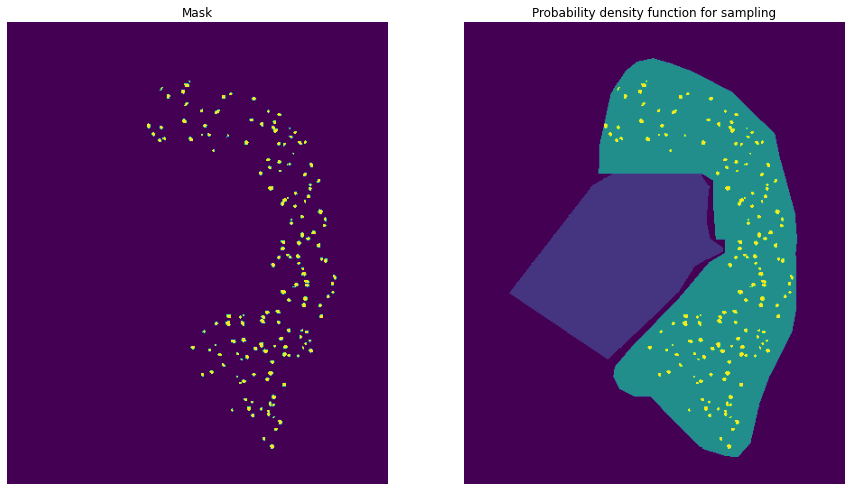

8242609fa with shape (31299, 44066)
Scaling to (22033, 15649)
Saving msk
Resizing PDF
Saving pdf cumsum


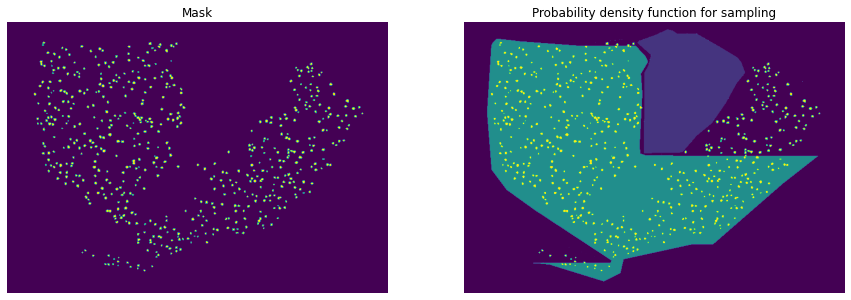

aaa6a05cc with shape (18484, 13013)
Scaling to (6506, 9242)
Saving msk
Resizing PDF
Saving pdf cumsum


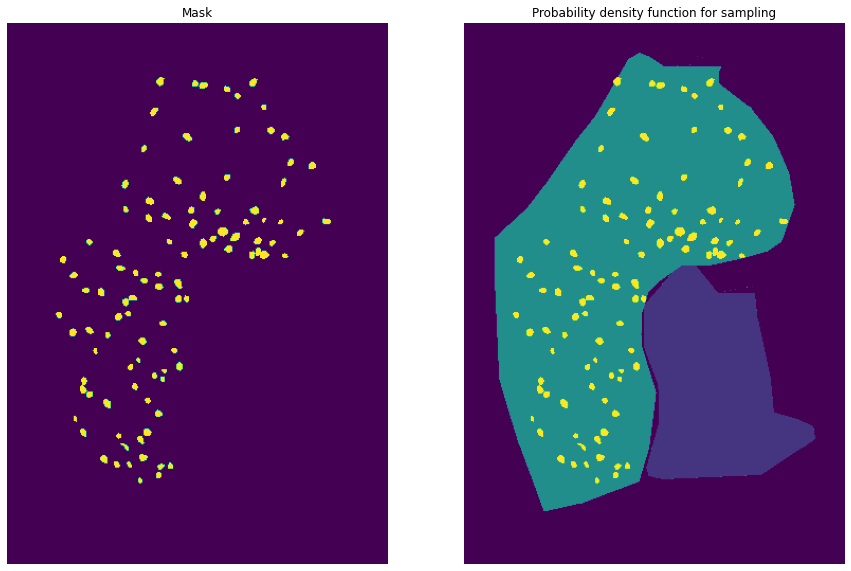

cb2d976f4 with shape (34940, 49548)
Scaling to (24774, 17470)
Saving msk
Resizing PDF
Saving pdf cumsum


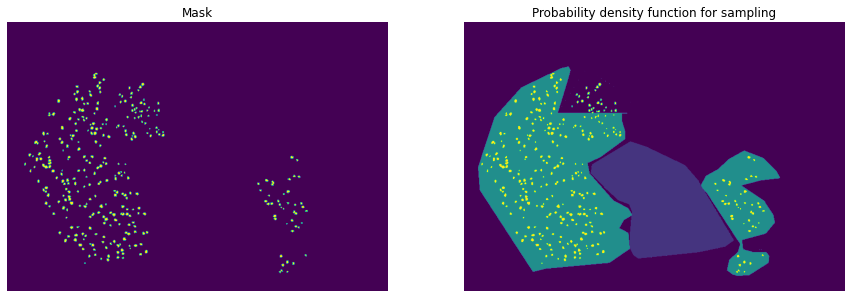

b9a3865fc with shape (31295, 40429)
Scaling to (20214, 15647)
Saving msk
Resizing PDF
Saving pdf cumsum


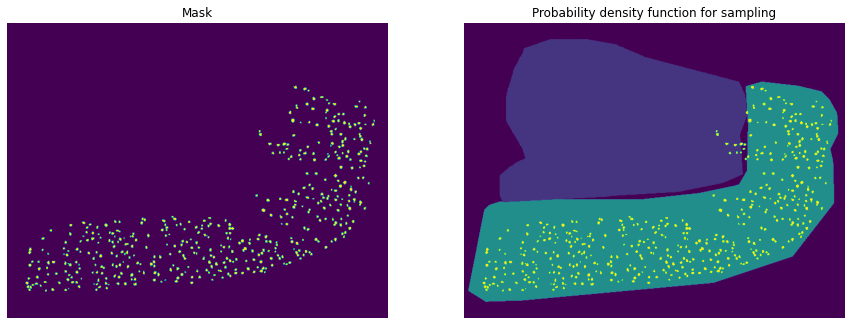

b2dc8411c with shape (14844, 31262)
Scaling to (15631, 7422)
Saving msk
Resizing PDF
Saving pdf cumsum


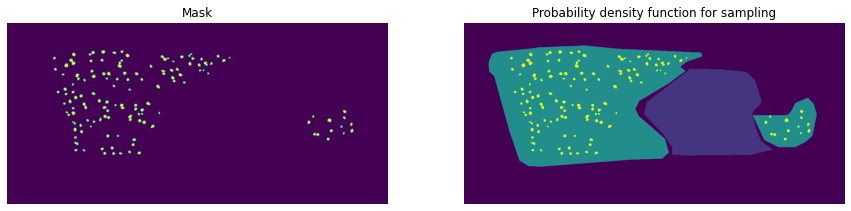

0486052bb with shape (25784, 34937)
Scaling to (17468, 12892)
Saving msk
Resizing PDF
Saving pdf cumsum


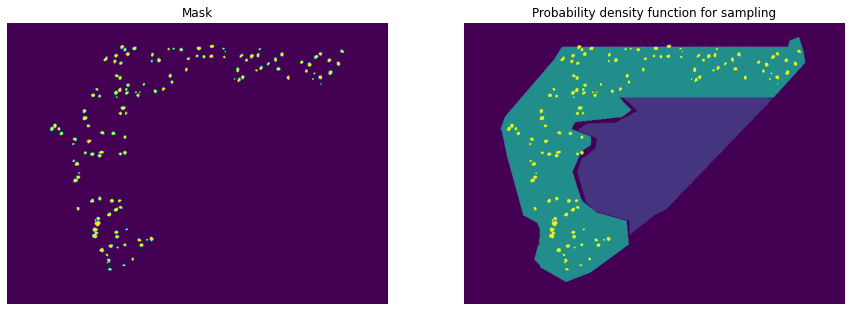

e79de561c with shape (16180, 27020)
Scaling to (13510, 8090)
Saving msk
Resizing PDF
Saving pdf cumsum


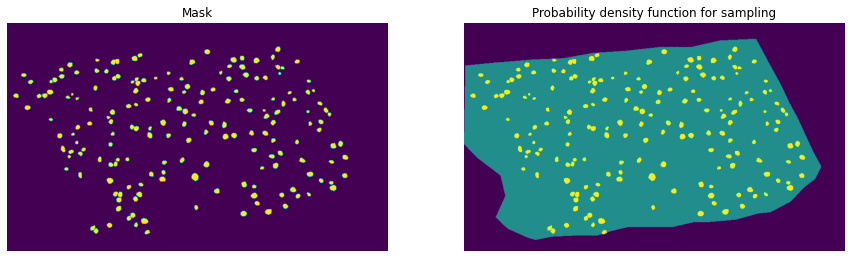

095bf7a1f with shape (38160, 39000)
Scaling to (19500, 19080)
Saving msk
Resizing PDF
Saving pdf cumsum


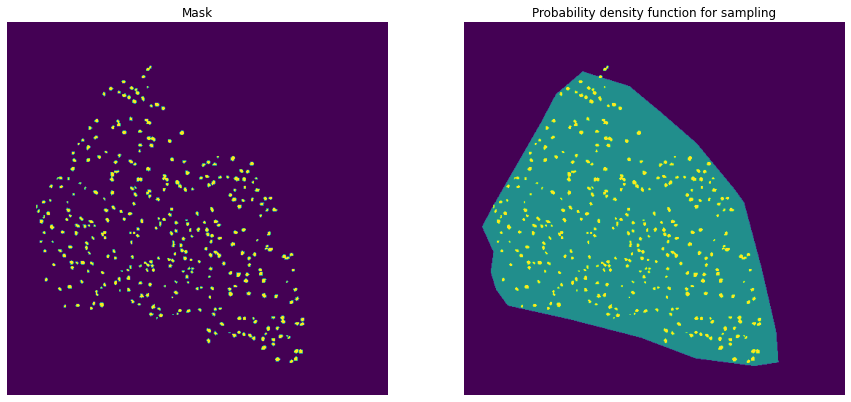

54f2eec69 with shape (30440, 22240)
Scaling to (11120, 15220)
Saving msk
Resizing PDF
Saving pdf cumsum


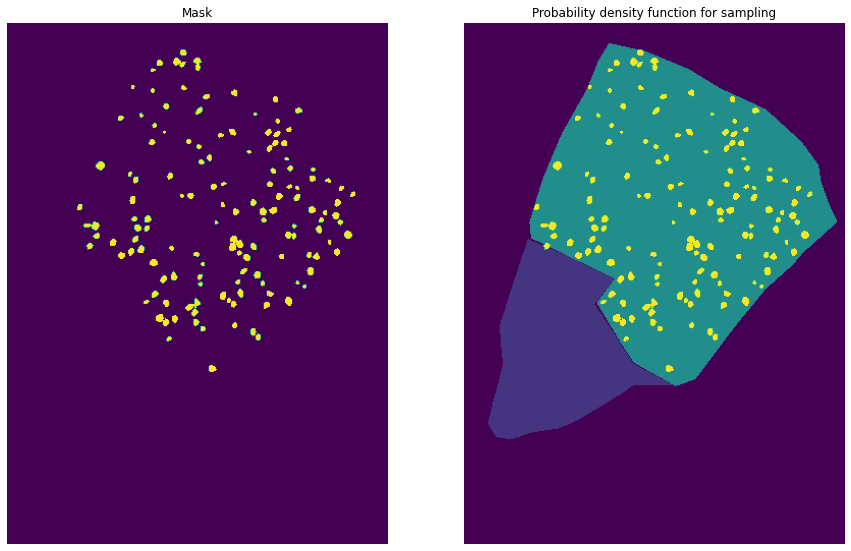

4ef6695ce with shape (39960, 50680)
Scaling to (25340, 19980)
Saving msk
Resizing PDF
Saving pdf cumsum


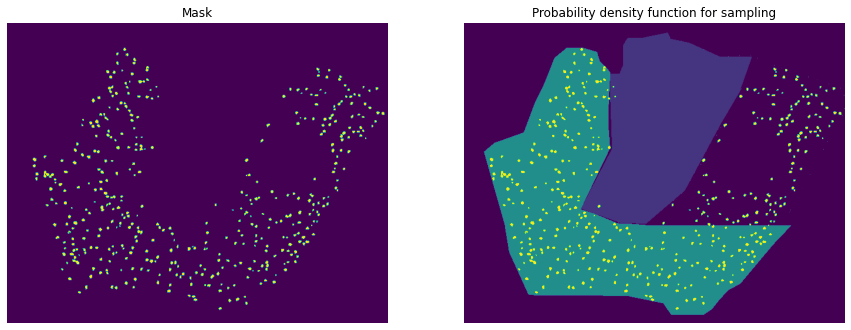

26dc41664 with shape (38160, 42360)
Scaling to (21180, 19080)
Saving msk
Resizing PDF
Saving pdf cumsum


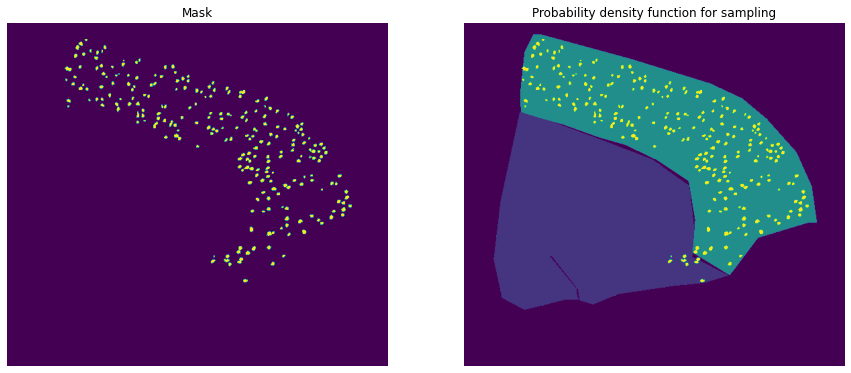

c68fe75ea with shape (26840, 49780)
Scaling to (24890, 13420)
Saving msk
Resizing PDF
Saving pdf cumsum


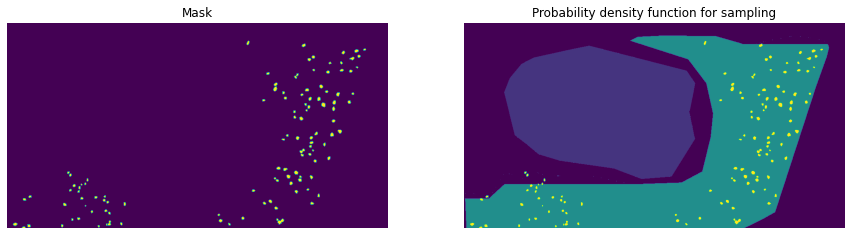

afa5e8098 with shape (36800, 43780)
Scaling to (21890, 18400)
Saving msk
Resizing PDF
Saving pdf cumsum


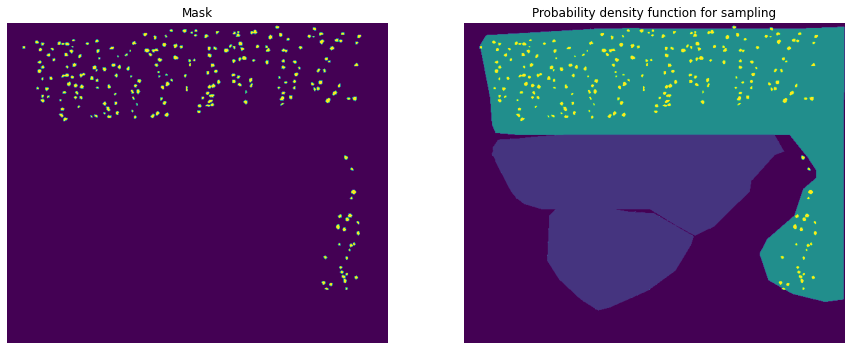

1e2425f28 with shape (26780, 32220)
Scaling to (16110, 13390)
Saving msk
Resizing PDF
Saving pdf cumsum


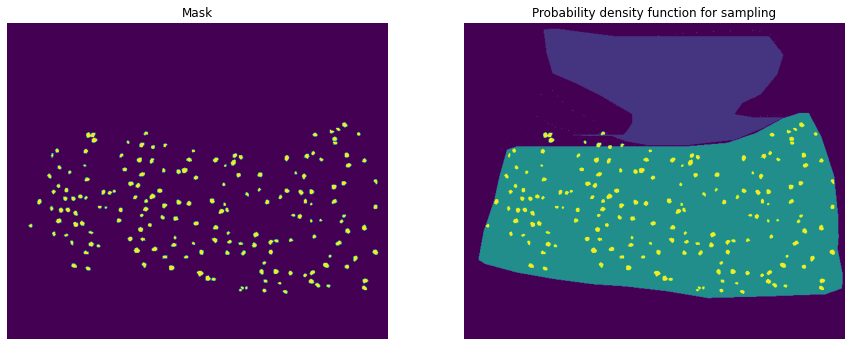

aa05346ff with shape (30720, 47340)
Scaling to (23670, 15360)
Saving msk
Resizing PDF
Saving pdf cumsum


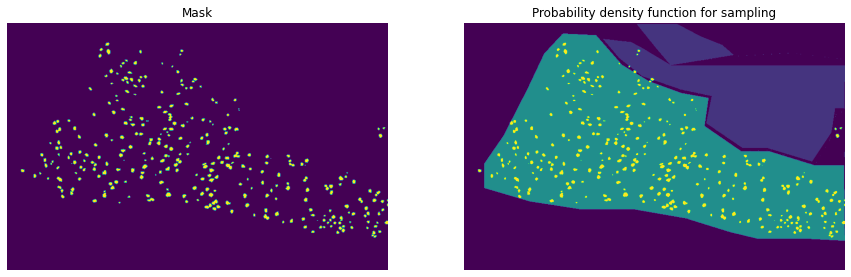

2ec3f1bb9 with shape (23990, 47723)
Scaling to (23861, 11995)
Saving msk
Resizing PDF
Saving pdf cumsum


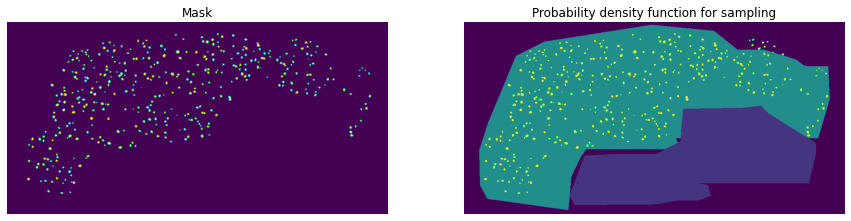

3589adb90 with shape (29433, 22165)
Scaling to (11082, 14716)
Saving msk
Resizing PDF
Saving pdf cumsum


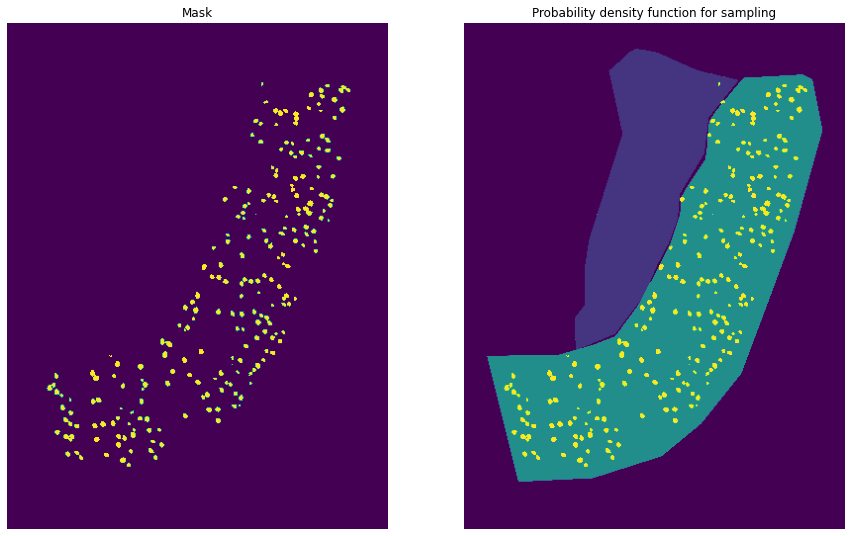

d488c759a with shape (46660, 29020)
Scaling to (14510, 23330)
Saving msk
Resizing PDF
Saving pdf cumsum


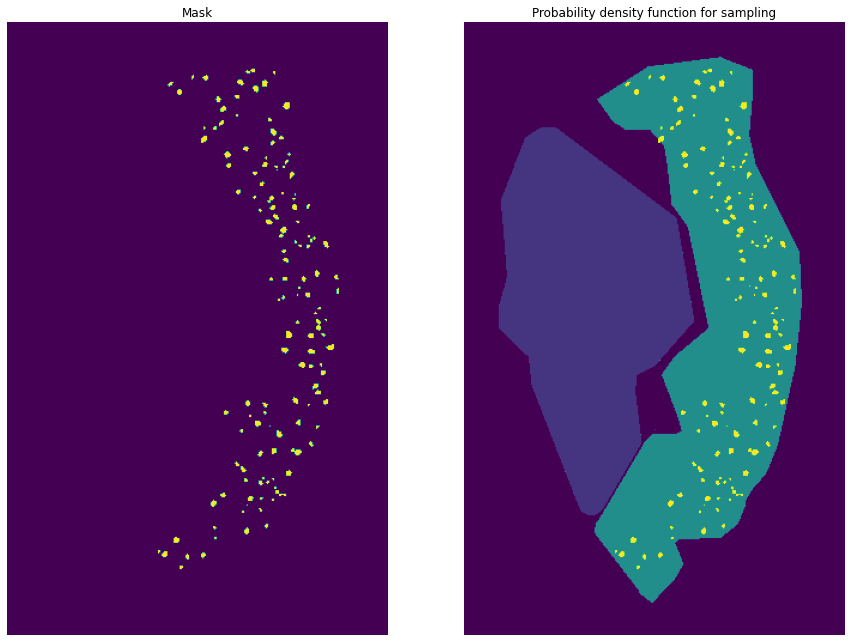

57512b7f1 with shape (33240, 43160)
Scaling to (21580, 16620)
Saving msk
Resizing PDF
Saving pdf cumsum


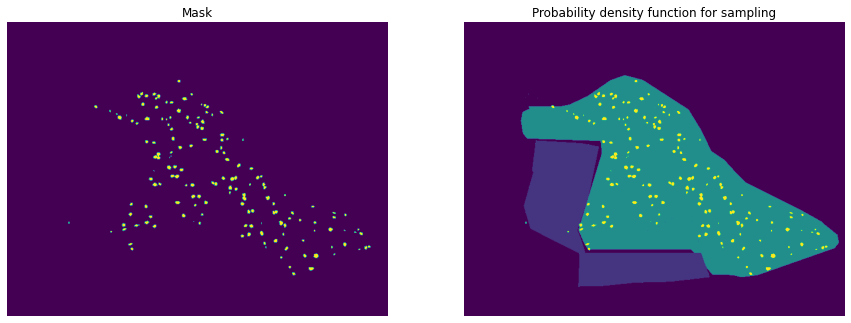

In [5]:
for _, row in df_train.iterrows():
    
    idx = row.id
    img_info = df_info[df_info.image_file==f'{idx}.tiff']
    shape = (img_info.height_pixels.values[0], img_info.width_pixels.values[0])
    print(idx, 'with shape', shape)
    
    msk = rle2mask(row.encoding, (shape[1], shape[0])).astype('uint8')
    
    # Plot
    fig, ax = plt.subplots(ncols=2, figsize=(15,15))
    resize_w = int((msk.shape[1]/msk.shape[0])*resize)
    ax[0].imshow(cv2.resize(msk, dsize=(resize_w, resize)))
    ax[0].set_title('Mask')
    ax[0].set_axis_off()
    
    anatomy = grp_anatomy[idx][:]
    
    if scale:
        new_size = (msk.shape[1] // scale, msk.shape[0] // scale)
        print('Scaling to', new_size)
        msk = cv2.resize(msk, new_size)
        anatomy = cv2.resize(anatomy, new_size)
        
    anatomy = anatomy.astype('float16')     
    anatomy[anatomy==0] = weight_dict['fbr']
    anatomy[anatomy==1] = weight_dict['cortex_value']
    anatomy[anatomy>1] = weight_dict['medulla_value']
    anatomy[msk>0] = 1
    
    print('Saving msk')
    g_msk[idx] = msk
    del msk
    gc.collect()
        
    if resize:
        print('Resizing PDF')
        if anatomy.shape[0]>resize:
            resize_w = int((anatomy.shape[1]/anatomy.shape[0])*resize)
            anatomy = cv2.resize(anatomy[:].astype('float32'), dsize=(resize_w, resize))
            
    ax[1].imshow(anatomy)
    ax[1].set_title('Probability density function for sampling')
    ax[1].set_axis_off() 
            
    print('Saving pdf cumsum')
    g_pdf[idx] = np.cumsum(anatomy/np.sum(anatomy)) 

    plt.show()